In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/Users/larsheijnen/Thesis/data/age/Age_at_visit_21Mar2025.csv'
data = pd.read_csv(file_path)

In [8]:
# Insert this cell before the plotting cell (id: 1ff2a2c0)
# Get the first visit entry for each unique patient
unique_patient_data = data.drop_duplicates(subset='PATNO', keep='first')

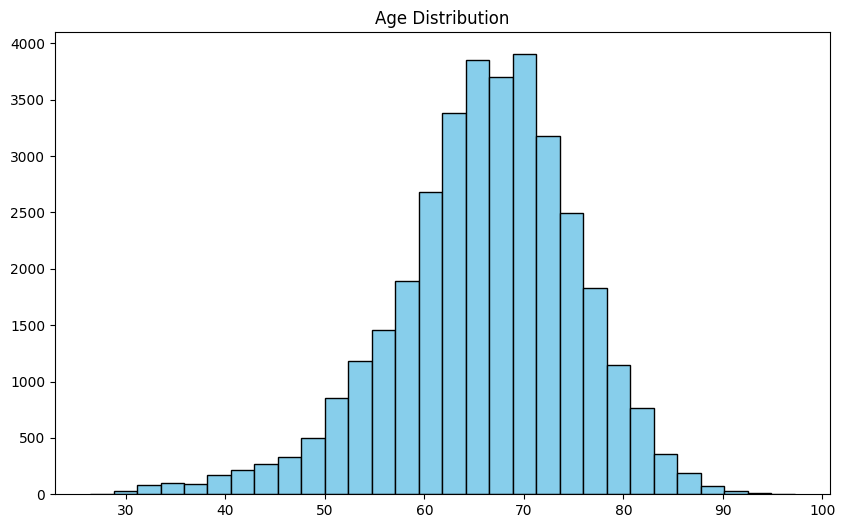

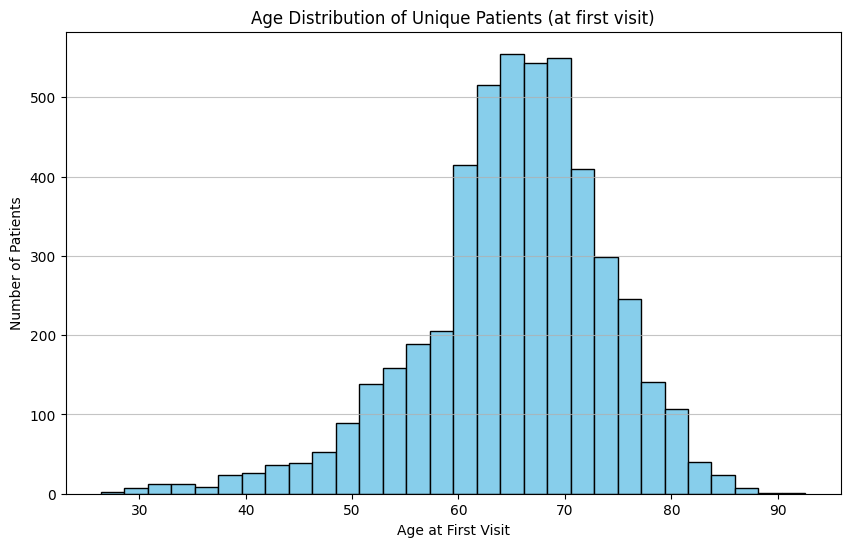

In [11]:
# Plot the age distribution
plt.figure(figsize=(10, 6))
plt.hist(data['AGE_AT_VISIT'], bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution')# Plot the age distribution for unique patients
plt.figure(figsize=(10, 6))
# Use unique_patient_data instead of data
plt.hist(unique_patient_data['AGE_AT_VISIT'], bins=30, color='skyblue', edgecolor='black')
# Update title
plt.title('Age Distribution of Unique Patients (at first visit)')
plt.xlabel('Age at First Visit')
plt.ylabel('Number of Patients')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [15]:
print("----------ages at first visit----------")
age_statistics_unique = unique_patient_data['AGE_AT_VISIT'].describe()
median_age_unique = unique_patient_data['AGE_AT_VISIT'].median()
print("Summary statistics for unique patient ages (at first visit):")
print(age_statistics_unique)
print(f"Median: {median_age_unique}")



print("\n----------ages for all recorded visits---------")
age_statistics = data['AGE_AT_VISIT'].describe()
median_age = data['AGE_AT_VISIT'].median()
print(age_statistics)
print(f"Median: {median_age}")


----------ages at first visit----------
Summary statistics for unique patient ages (at first visit):
count    4850.000000
mean       65.127155
std         8.870882
min        26.400000
25%        61.000000
50%        65.900000
75%        70.800000
max        92.600000
Name: AGE_AT_VISIT, dtype: float64
Median: 65.9

----------ages for all recorded visits---------
count    34755.000000
mean        66.037767
std          9.249471
min         26.400000
25%         61.000000
50%         66.700000
75%         72.200000
max         97.200000
Name: AGE_AT_VISIT, dtype: float64
Median: 66.7


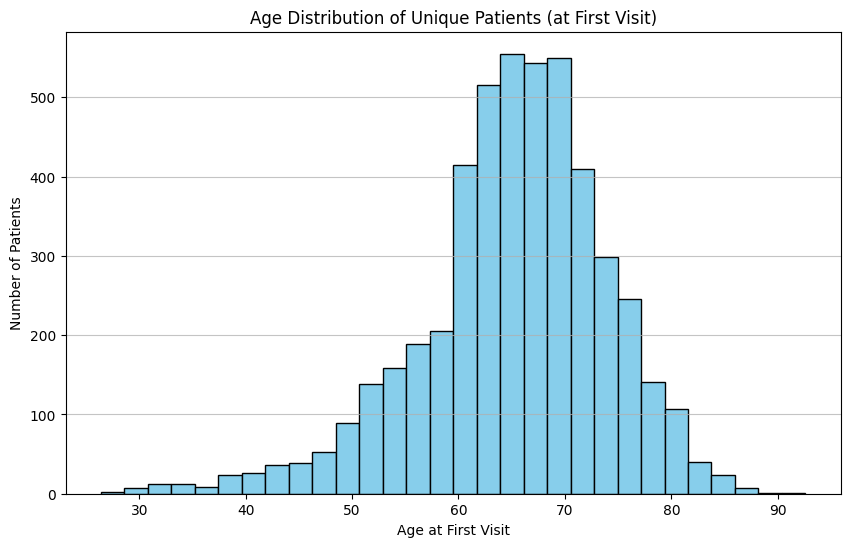

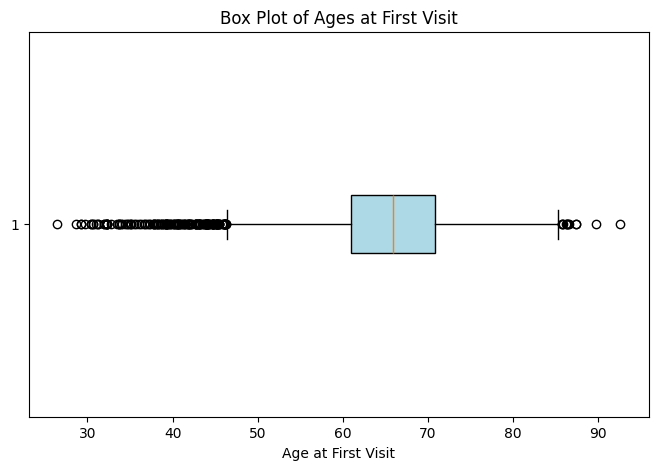

Skewness of Age Distribution: -0.73
Kurtosis of Age Distribution: 1.20


In [16]:
from scipy.stats import skew, kurtosis

# 1. Histogram – Visualize how ages are spread
plt.figure(figsize=(10, 6))
plt.hist(unique_patient_data['AGE_AT_VISIT'], bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Unique Patients (at First Visit)')
plt.xlabel('Age at First Visit')
plt.ylabel('Number of Patients')
plt.grid(axis='y', alpha=0.75)
plt.show()

# 2. Box Plot – See median, quartiles, and outliers
plt.figure(figsize=(8, 5))
plt.boxplot(unique_patient_data['AGE_AT_VISIT'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Box Plot of Ages at First Visit')
plt.xlabel('Age at First Visit')
plt.show()

# 3. Skewness – Measures asymmetry of the age distribution
age_skewness = skew(unique_patient_data['AGE_AT_VISIT'])
print(f"Skewness of Age Distribution: {age_skewness:.2f}")

# 4. Kurtosis – Tells you if the distribution is more peaked or flat than normal
age_kurtosis = kurtosis(unique_patient_data['AGE_AT_VISIT'])
print(f"Kurtosis of Age Distribution: {age_kurtosis:.2f}")

In [19]:
# Define age brackets
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']

# Create a new column for age groups using .loc
unique_patient_data.loc[:, 'Age_Group'] = pd.cut(unique_patient_data['AGE_AT_VISIT'], bins=bins, labels=labels, right=False)

# 1. Age group counts
age_group_counts = unique_patient_data['Age_Group'].value_counts().sort_index()

# 2. Proportions or percentages
age_group_percentages = (age_group_counts / age_group_counts.sum()) * 100

# Print counts and percentages
print("Age Group Counts:")
print(age_group_counts)
print("\nAge Group Percentages:")
print(age_group_percentages)


Age Group Counts:
Age_Group
0-9         0
10-19       0
20-29       2
30-39      53
40-49     180
50-59     713
60-69    2242
70-79    1462
80-89     196
90+         2
Name: count, dtype: int64

Age Group Percentages:
Age_Group
0-9       0.000000
10-19     0.000000
20-29     0.041237
30-39     1.092784
40-49     3.711340
50-59    14.701031
60-69    46.226804
70-79    30.144330
80-89     4.041237
90+       0.041237
Name: count, dtype: float64
